In [ ]:
import csv
import numpy as np
from scipy import signal
from scipy.signal import butter, lfilter
import matplotlib.pyplot as plt
from numpy.fft import fft, fftfreq
from scipy.fftpack import fft, ifft, fftfreq
import pandas as pd

csv_file = '/content/data.csv'

origin_data = []

with open(csv_file, newline='') as file:
    reader = csv.reader(file)
    for row in reader:
        origin_data.append(float(row[0]))

print(origin_data)

[5.79224, 6.11572, 6.604, 7.28149, 8.69141, 11.0229, 14.801, 17.9688, 18.7805, 15.686, 11.1816, 8.38013, 8.44116, 11.0413, 15.0879, 20.2209, 25.4333, 32.6965, 41.7786, 51.3428, 59.082, 63.6719, 66.8396, 70.1416, 73.2239, 76.178, 78.1494, 80.0293, 81.6345, 83.0872, 83.4717, 82.9529, 82.196, 83.1543, 84.491, 85.5774, 85.9375, 85.614, 85.6262, 85.3699, 85.4797, 84.9243, 84.0759, 82.9224, 81.7505, 82.074, 82.7332, 84.1187, 83.2214, 81.134, 79.6997, 79.6143, 81.3293, 83.3801, 87.4207, 93.9453, 98.7793, 99.0051, 94.4519, 90.9424, 88.501, 85.5164, 80.2673, 74.4202, 71.1365, 68.988, 66.5527, 63.2629, 60.1868, 58.7158, 58.7585, 61.3403, 64.1418, 65.9302, 65.5151, 63.6902, 61.5479, 60.1746, 60.614, 64.2029, 70.7458, 77.063, 79.1931, 75.4883, 68.4875, 61.7615, 56.0242, 52.8015, 51.3916, 51.062, 51.7578, 53.0273, 55.9692, 59.8877, 61.6455, 60.3699, 58.2642, 56.8542, 55.5908, 54.0405, 51.7456, 50.4272, 50.9094, 51.6296, 53.1555, 53.8757, 53.9551, 54.0833, 54.9927, 56.3721, 58.374, 60.022, 61.3464, 

In [ ]:
fs = 200
T = 0.005
time_vector = np.arange(0, len(origin_data) * T, T)
type_name = ['Alpha', 'Beta', 'Delta', 'Theta']
type_filter = ['band', 'band', 'low', 'band']
type_freq = [[8,13], [13,30], 4, [4,8]] # frequency (HZ)

In [ ]:
def plot_frequency_domain(frequencies, amplitude_spectrum, signal_name):
    plt.figure(figsize=(8, 6))
    plt.plot(frequencies, amplitude_spectrum)
    plt.title(f"{signal_name} - Frequency Domain")
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Normalized Magnitude')
    plt.grid(True)
    plt.show()

In [ ]:
def plot_time_domain(filtered_signal, signal_name):
    plt.figure(figsize=(120, 12))
    plt.plot(time_vector, filtered_signal)
    plt.title(f"{signal_name} - Time Domain")
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.xticks(np.arange(0, len(filtered_signal) * T, 0.1))
    plt.show()

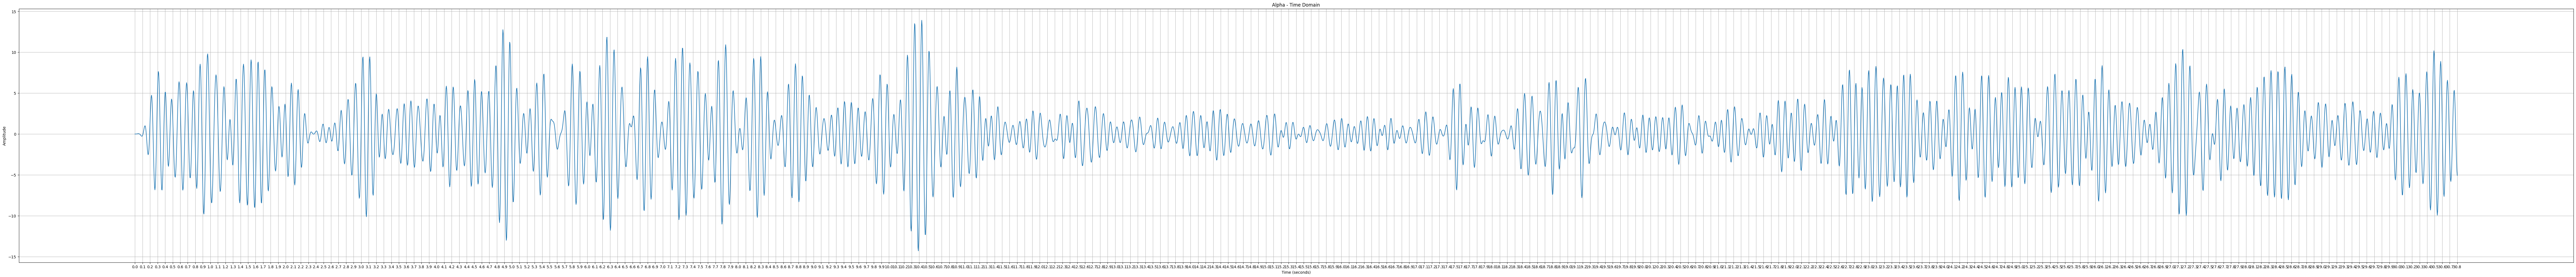

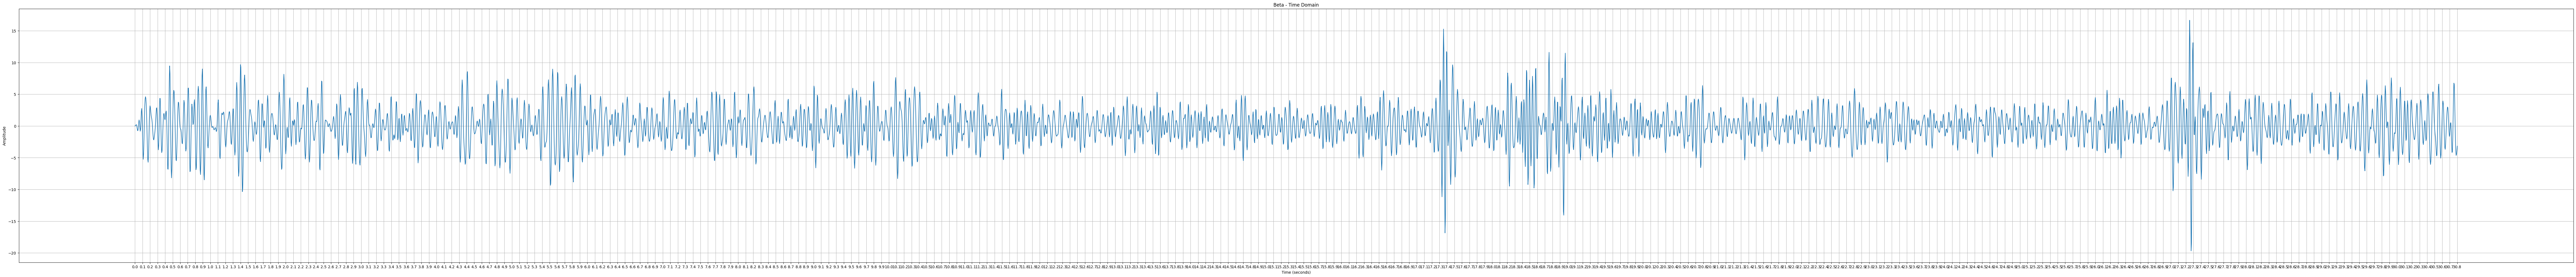

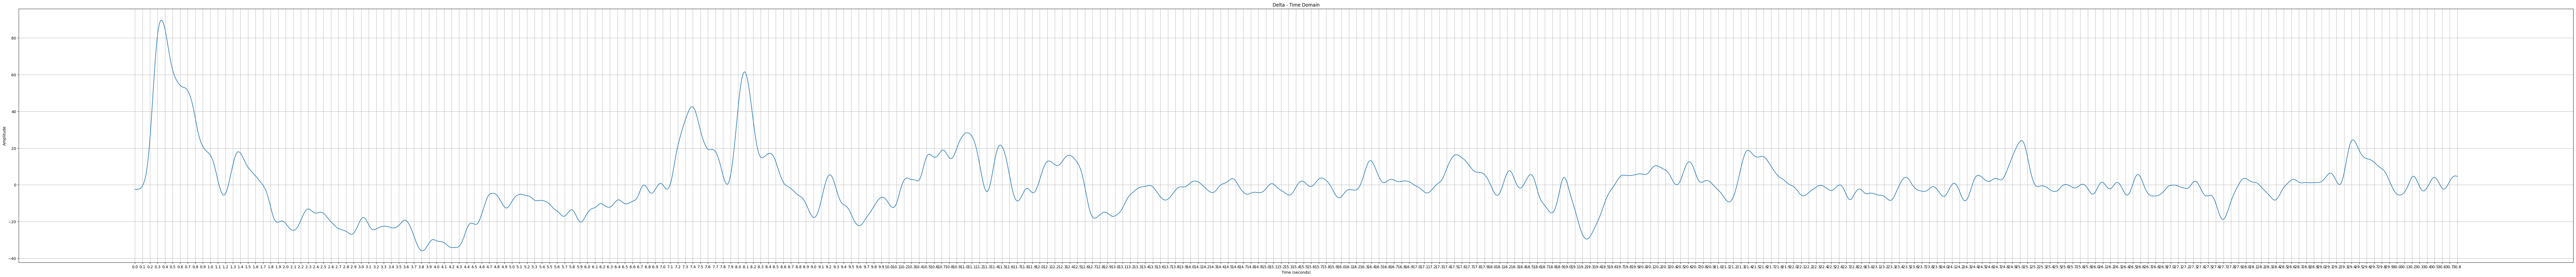

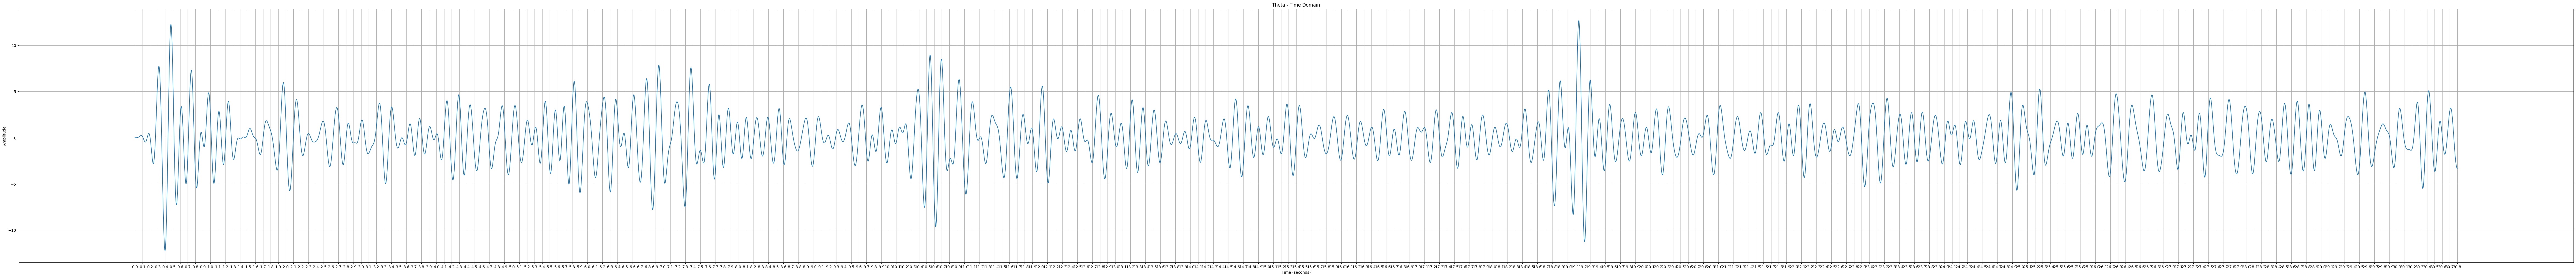

In [ ]:
filtered_signals = {}

for i in range(len(type_name)):
  btype = type_filter[i]
  if btype == 'band':
    freq = [2 * f / fs for f in type_freq[i]]
    b, a = butter(5, freq, btype)
  else:
    freq = 2 * type_freq[i] / fs
    b, a = butter(5, freq, btype)

  signal_data = origin_data
  signal_name = type_name[i]
  filtered_signal = lfilter(b, a, signal_data)
  N = len(filtered_signal)

  if signal_name == 'Delta':
    signal_avg = np.mean(filtered_signal)
    filtered_signal = filtered_signal - signal_avg

  filtered_signals[signal_name] = filtered_signal

  plot_time_domain(filtered_signal, signal_name)

  filtered_signal_fft = fft(filtered_signal)
  frequencies = fftfreq(N, T)
  amplitude_spectrum = np.abs(filtered_signal_fft)
  amplitude_spectrum_normalized = amplitude_spectrum / np.max(amplitude_spectrum)
  #plot_frequency_domain(frequencies, amplitude_spectrum_normalized, signal_name)

In [ ]:
output_df = pd.DataFrame({
    "Time (s)": time_vector,
    "Alpha": filtered_signals["Alpha"],
    "Beta": filtered_signals["Beta"],
    "Delta": filtered_signals["Delta"],
    "Theta": filtered_signals["Theta"]
})

output_path = "/content/drive/MyDrive/datatest/filtered_signals.csv"
output_df.to_csv(output_path, index=False)

print(f"Filtered signals saved to {output_path}")

Filtered signals saved to /content/drive/MyDrive/datatest/filtered_signals.csv
